# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
import seaborn as sns 
import scipy as sp
try:
    import urllib2
except ImportError:
    import urllib
    
%matplotlib inline

In [2]:
os.environ["HOME"] = '/Users/A123/Documents/Rufei_Sheng/PUI2018'    #ADRF时删除
os.environ["PUIDATA"] = '%s/PUIdata'%os.getenv('HOME')  #设置环境变量PUIDATA
if os.getenv('PUIDATA') is None:
    print('must set up env var PUIDATA')
else:
    print ('env var PUIDATA exist')


env var PUIDATA exist


# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

###  firearms murders and ownership data

In [3]:
firearms= pd.read_csv('World firearms murders and ownership - Sheet 1.csv')
firearms.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [4]:
firearms_sub = firearms[['Country/Territory', 'Average total all civilian firearms', 'Number of homicides by firearm']]
firearms_sub.head()

,Country/Territory,Average total all civilian firearms,Number of homicides by firearm
0,Albania,270000.0,56.0
1,Algeria,1900000.0,20.0
2,Angola,2800000.0,NaN
3,Anguilla,NaN,1.0
4,Argentina,3950000.0,1198.0


###  mass shooting data （download from web)

In [5]:
#"copy link" shown in website is: (which is invalid using curl)
#data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78

In [6]:
masshoot= pd.read_csv('data-pvLFI.csv')
masshoot.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [7]:
merge_1 = pd.merge(masshoot, firearms_sub, left_on='Country', right_on='Country/Territory', how='inner')
merge_1.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country/Territory,Average total all civilian firearms,Number of homicides by firearm
0,Australia,15.0,4,Australia,3050000.0,30.0
1,Austria,30.4,1,Austria,2500000.0,18.0
2,Belgium,17.2,2,Belgium,1800000.0,70.0
3,Canada,30.8,4,Canada,9950000.0,173.0
4,Denmark,12.0,0,Denmark,650000.0,15.0


###  world population data （use 2012 data)

In [8]:
worldpop = pd.read_excel('http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel', skiprows=3)
worldpop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [9]:
worldpop_12 = worldpop[['Country Name', '2012']] 
worldpop_12.rename(columns={'2012':'pop'}, inplace=True)
worldpop_12.head()

/Users/A123/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [10]:
merge_2 = pd.merge(merge_1, worldpop_12, left_on='Country', right_on='Country Name', how='inner')
merge_2.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country/Territory,Average total all civilian firearms,Number of homicides by firearm,Country Name,pop
0,Australia,15.0,4,Australia,3050000.0,30.0,Australia,22742475.0
1,Austria,30.4,1,Austria,2500000.0,18.0,Austria,8429991.0
2,Belgium,17.2,2,Belgium,1800000.0,70.0,Belgium,11128246.0
3,Canada,30.8,4,Canada,9950000.0,173.0,Canada,34750545.0
4,Denmark,12.0,0,Denmark,650000.0,15.0,Denmark,5591572.0


### GDP data

In [11]:
GDP = pd.read_excel('http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel', skiprows=3)
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [12]:
GDP_12 = GDP[['Country Name', '2012']] 
GDP_12.rename(columns={'2012':'gdp'}, inplace=True)
GDP_12.head()

/Users/A123/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [13]:
merge_3 = pd.merge(merge_2, GDP_12, left_on='Country', right_on='Country Name', how='inner')
merge_3.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country/Territory,Average total all civilian firearms,Number of homicides by firearm,Country Name_x,pop,Country Name_y,gdp
0,Australia,15.0,4,Australia,3050000.0,30.0,Australia,22742475.0,Australia,1.543411e+12
1,Austria,30.4,1,Austria,2500000.0,18.0,Austria,8429991.0,Austria,4.094252e+11
2,Belgium,17.2,2,Belgium,1800000.0,70.0,Belgium,11128246.0,Belgium,4.978842e+11
3,Canada,30.8,4,Canada,9950000.0,173.0,Canada,34750545.0,Canada,1.824289e+12
4,Denmark,12.0,0,Denmark,650000.0,15.0,Denmark,5591572.0,Denmark,3.271489e+11


In [14]:
df = merge_3
df.drop(['Country Name_x', 'Country/Territory', 'Country Name_y'], axis=1, inplace=True)
df.rename(columns={'Number of mass shootings (1983-2013)':'Number of mass shootings'}, inplace=True)

In [15]:
df.head()

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp
0,Australia,15.0,4,3050000.0,30.0,22742475.0,1.543411e+12
1,Austria,30.4,1,2500000.0,18.0,8429991.0,4.094252e+11
2,Belgium,17.2,2,1800000.0,70.0,11128246.0,4.978842e+11
3,Canada,30.8,4,9950000.0,173.0,34750545.0,1.824289e+12
4,Denmark,12.0,0,650000.0,15.0,5591572.0,3.271489e+11


# exploration

## 1. plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [16]:
df.head()

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp
0,Australia,15.0,4,3050000.0,30.0,22742475.0,1.543411e+12
1,Austria,30.4,1,2500000.0,18.0,8429991.0,4.094252e+11
2,Belgium,17.2,2,1800000.0,70.0,11128246.0,4.978842e+11
3,Canada,30.8,4,9950000.0,173.0,34750545.0,1.824289e+12
4,Denmark,12.0,0,650000.0,15.0,5591572.0,3.271489e+11


In [17]:
#create a column for GDP per person
df1 = df
df1['gdp_pp'] = df1['gdp']/df1['pop']
df1['shootingpp(3)'] = df1['Number of mass shootings']*1e3/df1['pop']
df1.head() 

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,gdp_pp,shootingpp(3)
0,Australia,15.0,4,3050000.0,30.0,22742475.0,1.543411e+12,67864.689862,0.000176
1,Austria,30.4,1,2500000.0,18.0,8429991.0,4.094252e+11,48567.695286,0.000119
2,Belgium,17.2,2,1800000.0,70.0,11128246.0,4.978842e+11,44740.583248,0.000180
3,Canada,30.8,4,9950000.0,173.0,34750545.0,1.824289e+12,52496.694870,0.000115
4,Denmark,12.0,0,650000.0,15.0,5591572.0,3.271489e+11,58507.500210,0.000000


Text(0.5,1,'Figure 2: mass shooting Vs GDP per person')

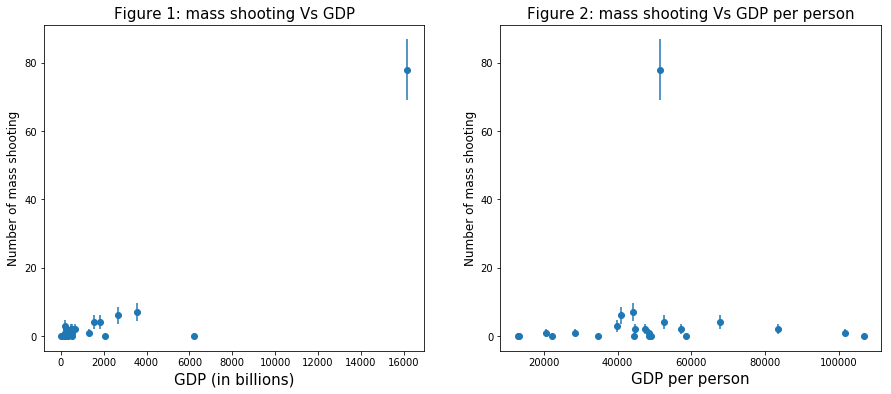

In [18]:
#plot ax1 for mass shooting Vs GDP
fig = plt.figure(2, figsize=(15,6)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df1.gdp / 1e9, df1['Number of mass shootings'])
ax1.errorbar(df1.gdp / 1e9, df1['Number of mass shootings'], 
            yerr = np.sqrt(df1['Number of mass shootings'] * 1.0), fmt = '.')
ax1.set_xlabel('GDP (in billions)', fontsize=15)
ax1.set_ylabel("Number of mass shooting", fontsize=12)
ax1.set_ylim()
ax1.set_title('Figure 1: mass shooting Vs GDP', fontsize=15)

#plot ax2 for mass shooting Vs GDP per person
ax2.scatter(df1['gdp_pp'], df1['Number of mass shootings'])
ax2.errorbar(df1['gdp_pp'], df1['Number of mass shootings'], 
            yerr = np.sqrt(df1['Number of mass shootings'] * 1.0), fmt = '.')
ax2.set_xlabel('GDP per person', fontsize=15)
ax2.set_ylabel("Number of mass shooting", fontsize=12)
ax2.set_ylim()
ax2.set_title('Figure 2: mass shooting Vs GDP per person', fontsize=15)

**Figure 1:** Number of mass shooting vs GDP, the errors represent Poisson statistics.The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings.

**Figure 2:** Number of mass shooting vs GDP per person, the errors represent Poisson statistics.The datapoint to the top right of the plot is the USA, which has the highest number of mass shootings but just medium GDP per person. The datapoints at the bottom right are the Luxembourg and Norway, which have the highest GDP per person and low mass shooting.

In [19]:
#Figure out who is the outilers:
Figout1 = df1[df1['Number of mass shootings'] > 40]
Figout1

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,gdp_pp,shootingpp(3)
22,United States,88.8,78,270000000.0,9146.0,313993272.0,1.615526e+13,51450.959115,0.000248


In [20]:
Figout2 = df1[df1['gdp_pp'] > 100000]
Figout2

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,gdp_pp,shootingpp(3)
14,Luxembourg,15.3,0,70000.0,3.0,530946.0,5.667796e+10,106749.013623,0.000000
16,Norway,31.3,1,1400000.0,2.0,5018573.0,5.102291e+11,101668.170659,0.000199


## 2. plot the average number of civilian fire arms per person 
first without errors, then with errors. are there  points that look like outliers?

In [21]:
#since the pop is too large, convert to per 1000 person
df1['cibilianpp(3)'] = df1["Average total all civilian firearms"] * 1e3 / df1['pop']  
df1.head()

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,gdp_pp,shootingpp(3),cibilianpp(3)
0,Australia,15.0,4,3050000.0,30.0,22742475.0,1.543411e+12,67864.689862,0.000176,134.110294
1,Austria,30.4,1,2500000.0,18.0,8429991.0,4.094252e+11,48567.695286,0.000119,296.560222
2,Belgium,17.2,2,1800000.0,70.0,11128246.0,4.978842e+11,44740.583248,0.000180,161.750558
3,Canada,30.8,4,9950000.0,173.0,34750545.0,1.824289e+12,52496.694870,0.000115,286.326445
4,Denmark,12.0,0,650000.0,15.0,5591572.0,3.271489e+11,58507.500210,0.000000,116.246379


In [23]:
# Figure out the country who is the outlier.
out = df1[df1['cibilianpp(3)']>600]
out

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,gdp_pp,shootingpp(3),cibilianpp(3)
22,United States,88.8,78,270000000.0,9146.0,313993272.0,1.615526e+13,51450.959115,0.000248,859.891036


Text(0.5,1,'average number of civilian fire arms per 1000 person')

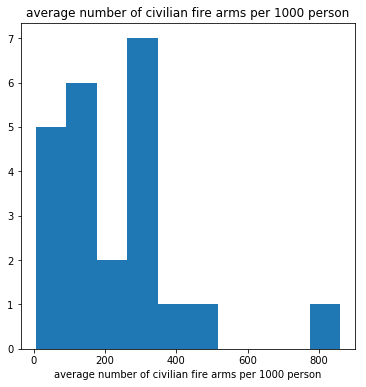

In [24]:
fig, ax = plt.subplots(figsize=(6,6)) 
ax.hist(df1['cibilianpp(3)'])
error = np.sqrt(df1['cibilianpp(3)'] * 1.0)
ax.set_xlabel('average number of civilian fire arms per 1000 person')
ax.set_title('average number of civilian fire arms per 1000 person')

**Figure 3**: The average number of civilian fire arms per 1000 person, United Satates has the highest civilian fire arms per 1000 person.

Text(0.5,1,'Average number of civilian fire arms per 1000 person Vs GDP')

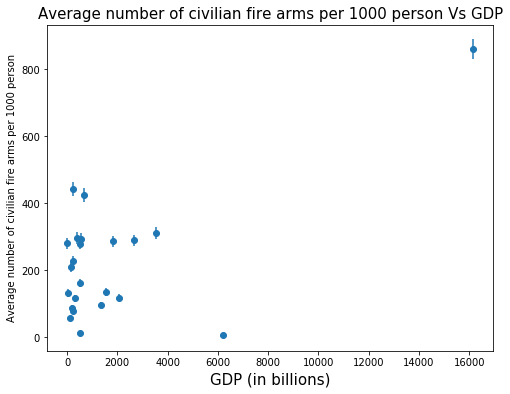

In [25]:
fig = plt.figure(figsize=(8,6))
plt.scatter(df1.gdp / 1e9, df1['cibilianpp(3)'])
plt.errorbar(df1.gdp / 1e9, df1['cibilianpp(3)'], 
            yerr = np.sqrt(df1['cibilianpp(3)']* 1.0), fmt = '.')
plt.xlabel('GDP (in billions)', fontsize=15)
plt.ylabel("Average number of civilian fire arms per 1000 person", fontsize=10)
plt.ylim()
plt.title('Average number of civilian fire arms per 1000 person Vs GDP', fontsize=15)

**Figure 4:** The average number of civilian fire arms per 1000 person against GDP(in billions) with the error bar, United Satates has the highest civilian fire arms per 1000 person.

## 3. plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [26]:
df1['homicidespp(3)'] = df1['Number of homicides by firearm'] * 1e3 / df1['pop']
df1.head()

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,gdp_pp,shootingpp(3),cibilianpp(3),homicidespp(3)
0,Australia,15.0,4,3050000.0,30.0,22742475.0,1.543411e+12,67864.689862,0.000176,134.110294,0.001319
1,Austria,30.4,1,2500000.0,18.0,8429991.0,4.094252e+11,48567.695286,0.000119,296.560222,0.002135
2,Belgium,17.2,2,1800000.0,70.0,11128246.0,4.978842e+11,44740.583248,0.000180,161.750558,0.006290
3,Canada,30.8,4,9950000.0,173.0,34750545.0,1.824289e+12,52496.694870,0.000115,286.326445,0.004978
4,Denmark,12.0,0,650000.0,15.0,5591572.0,3.271489e+11,58507.500210,0.000000,116.246379,0.002683


In [27]:
#filter the outlier
df_ = df1[df1['homicidespp(3)']>0.025]
df_

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,gdp_pp,shootingpp(3),cibilianpp(3),homicidespp(3)
22,United States,88.8,78,270000000.0,9146.0,313993272.0,1.615526e+13,51450.959115,0.000248,859.891036,0.029128


Text(0,0.5,'number')

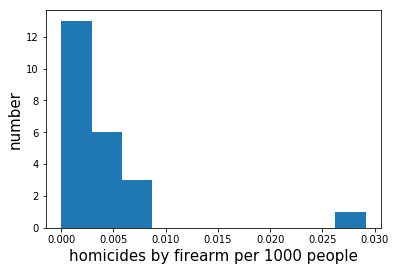

In [28]:
fig, ax = plt.subplots()
ax.hist(df1['homicidespp(3)'])
ax.set_xlabel('homicides by firearm per 1000 people', fontsize=15)
ax.set_ylabel('number', fontsize=15)

**Figure5:** The histgram of the average number of homicide by fire arms per 1000 person, the united states has the highest homicide rate. 

Text(0.5,1,'Average number of homicide Vs GDP')

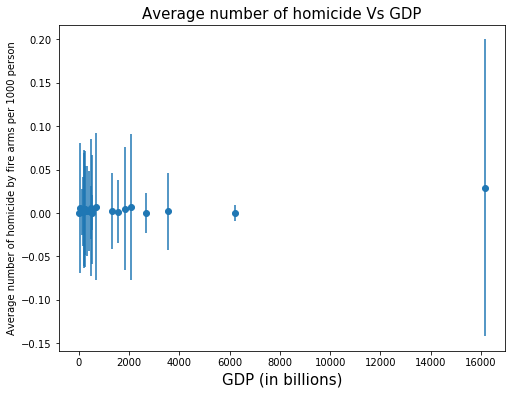

In [29]:
#against GDP with outliers
fig = plt.figure(figsize=(8,6))
plt.scatter(df1.gdp / 1e9, df1['homicidespp(3)'])
plt.errorbar(df1.gdp / 1e9, df1['homicidespp(3)'], 
            yerr = np.sqrt(df1['homicidespp(3)']* 1.0), fmt = '.')
plt.xlabel('GDP (in billions)', fontsize=15)
plt.ylabel("Average number of homicide by fire arms per 1000 person", fontsize=10)
plt.ylim()
plt.title('Average number of homicide Vs GDP', fontsize=15)

**Figure6:** This fugure plots average number of homicide by fire arms per 1000 person against the country GDP, with statistical errors. The united states has the highese GDP, highest average numbr of homicide with largest error.

## 4. plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [30]:
df1.head()

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,gdp_pp,shootingpp(3),cibilianpp(3),homicidespp(3)
0,Australia,15.0,4,3050000.0,30.0,22742475.0,1.543411e+12,67864.689862,0.000176,134.110294,0.001319
1,Austria,30.4,1,2500000.0,18.0,8429991.0,4.094252e+11,48567.695286,0.000119,296.560222,0.002135
2,Belgium,17.2,2,1800000.0,70.0,11128246.0,4.978842e+11,44740.583248,0.000180,161.750558,0.006290
3,Canada,30.8,4,9950000.0,173.0,34750545.0,1.824289e+12,52496.694870,0.000115,286.326445,0.004978
4,Denmark,12.0,0,650000.0,15.0,5591572.0,3.271489e+11,58507.500210,0.000000,116.246379,0.002683


In [31]:
other = df1[df1['Country']!='United States']
US = df1[df1['Country']=='United States']
US

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,gdp_pp,shootingpp(3),cibilianpp(3),homicidespp(3)
22,United States,88.8,78,270000000.0,9146.0,313993272.0,1.615526e+13,51450.959115,0.000248,859.891036,0.029128


### without errorbar

Text(0.5,1,'homicides by firearm Vs civilian firearms(in million)')

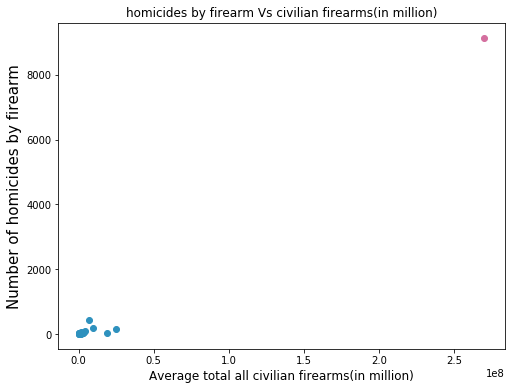

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(other['Average total all civilian firearms'], other['Number of homicides by firearm'], color="#2e91be")
# plot us in a different color
ax.scatter(US['Average total all civilian firearms'], US['Number of homicides by firearm'], color="#d46f9f")
#ax.errorbar(df1.gdp / 1e9, df1['Number of mass shootings'], 
            #yerr = np.sqrt(df1['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_ylabel('Number of homicides by firearm', fontsize=15)
ax.set_xlabel("Average total all civilian firearms(in million)", fontsize=12)
ax.set_ylim()
ax.set_title('homicides by firearm Vs civilian firearms(in million)', fontsize=12)

**Figure7**: plot the total number of homicides by fire arm against the number of civilian firearms (US in a different color)

### with errorbar

Text(0.5,1,'homicides by firearm Vs civilian firearms(in million)')

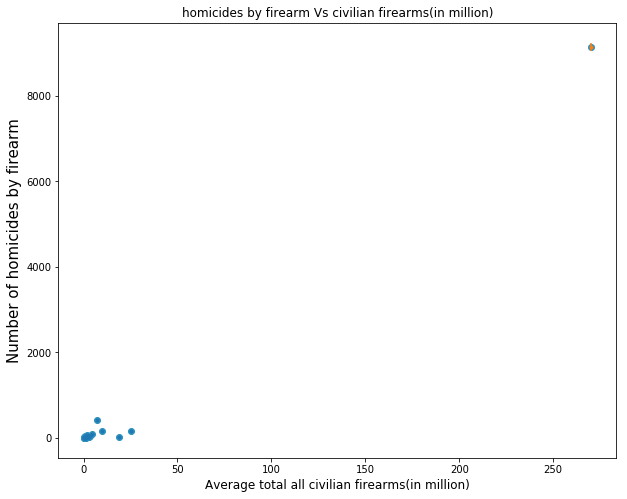

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(other['Average total all civilian firearms']/1e6, other['Number of homicides by firearm'], color="#2e91be")
ax.errorbar(other['Average total all civilian firearms']/1e6, other['Number of homicides by firearm'], 
            yerr = np.sqrt(other['Number of homicides by firearm'] * 1.0), fmt = '.')
# plot us in a different color
ax.scatter(US['Average total all civilian firearms']/1e6, US['Number of homicides by firearm'], color="#2e91be")
ax.errorbar(US['Average total all civilian firearms']/1e6, US['Number of homicides by firearm'], 
            yerr = np.sqrt(US['Number of homicides by firearm'] * 1.0), fmt = '.')
ax.set_ylabel('Number of homicides by firearm', fontsize=15)
ax.set_xlabel("Average total all civilian firearms(in million)", fontsize=12)
ax.set_ylim()
ax.set_title('homicides by firearm Vs civilian firearms(in million)', fontsize=12)

**Figure 8**: plot the number of homicides by fire arm against the number of civilian firearms (US in a different color). The error bar is smaller in this plot.

## 5. plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


### without error

Text(0.5,1,'mass shootings Vs civilian firearms(in million)')

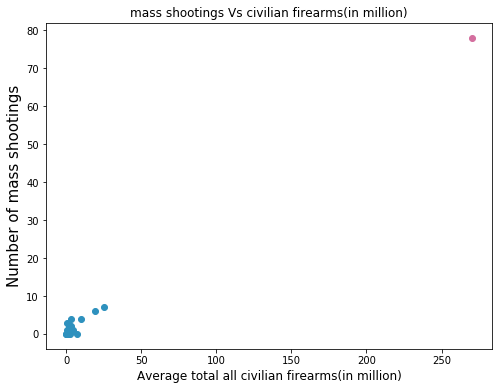

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(other['Average total all civilian firearms']/1e6, other['Number of mass shootings'], color="#2e91be")
# plot us in a different color
ax.scatter(US['Average total all civilian firearms']/1e6, US['Number of mass shootings'], color="#d46f9f")
#ax.errorbar(df1.gdp / 1e9, df1['Number of mass shootings'], 
            #yerr = np.sqrt(df1['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_ylabel('Number of mass shootings', fontsize=15)
ax.set_xlabel("Average total all civilian firearms(in million)", fontsize=12)
ax.set_ylim()
ax.set_title('mass shootings Vs civilian firearms(in million)', fontsize=12)

**Figure 9**: plot the number of mass shootings against the number of civilian firearms (US in a different color)

### with error

Text(0.5,1,'mass shootings Vs civilian firearms(in million)')

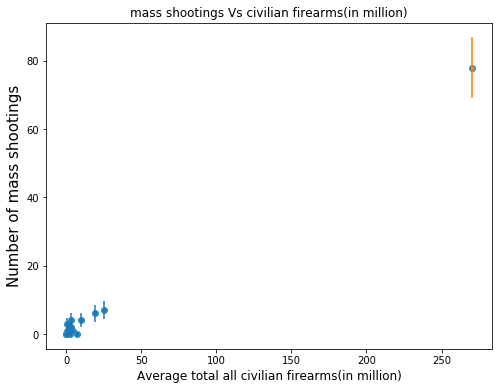

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(other['Average total all civilian firearms']/1e6, other['Number of mass shootings'], color="#2e91be")
ax.errorbar(other['Average total all civilian firearms']/1e6, other['Number of mass shootings'], 
            yerr = np.sqrt(other['Number of mass shootings'] * 1.0), fmt = '.')
# plot us in a different color
ax.scatter(US['Average total all civilian firearms']/1e6, US['Number of mass shootings'], color="#2e91be")
ax.errorbar(US['Average total all civilian firearms']/1e6, US['Number of mass shootings'], 
            yerr = np.sqrt(US['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_ylabel('Number of mass shootings', fontsize=15)
ax.set_xlabel("Average total all civilian firearms(in million)", fontsize=12)
ax.set_ylim()
ax.set_title('mass shootings Vs civilian firearms(in million)', fontsize=12)

**Figure 10**: plot the number of mass shootings against the number of civilian firearms (US in a different color), the error bar is large for U.S.

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [38]:
df1.head()

,Country,Guns per 100 inhabitants,Number of mass shootings,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,gdp_pp,shootingpp(3),cibilianpp(3),homicidespp(3)
0,Australia,15.0,4,3050000.0,30.0,22742475.0,1.543411e+12,67864.689862,0.000176,134.110294,0.001319
1,Austria,30.4,1,2500000.0,18.0,8429991.0,4.094252e+11,48567.695286,0.000119,296.560222,0.002135
2,Belgium,17.2,2,1800000.0,70.0,11128246.0,4.978842e+11,44740.583248,0.000180,161.750558,0.006290
3,Canada,30.8,4,9950000.0,173.0,34750545.0,1.824289e+12,52496.694870,0.000115,286.326445,0.004978
4,Denmark,12.0,0,650000.0,15.0,5591572.0,3.271489e+11,58507.500210,0.000000,116.246379,0.002683


In [40]:
#get the magnitude for x
np.mean(df1['Average total all civilian firearms']/df1['pop'])

0.2260159524542475

In [41]:
#get the magnitude for y
np.mean(df1['Number of mass shootings']/df1['pop'])

1.2356888832925397e-07

In [48]:
x = (df1['Average total all civilian firearms']/df1['pop'])
y = (df1['Number of mass shootings']/df1['pop'])*1e7

In [49]:
data = np.array([x,y])
data = pd.DataFrame({'x':data[0], 'y':data[1]})
data.head()

,x,y
0,0.134110,1.758824
1,0.296560,1.186241
2,0.161751,1.797228
3,0.286326,1.151061
4,0.116246,0.000000


In [81]:
#calculate the weights for wls, replace inf by mean error
error = 1.0/np.sqrt(data.y)
weights = error.replace(np.inf, np.mean(np.sqrt(data.y)))

/Users/A123/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


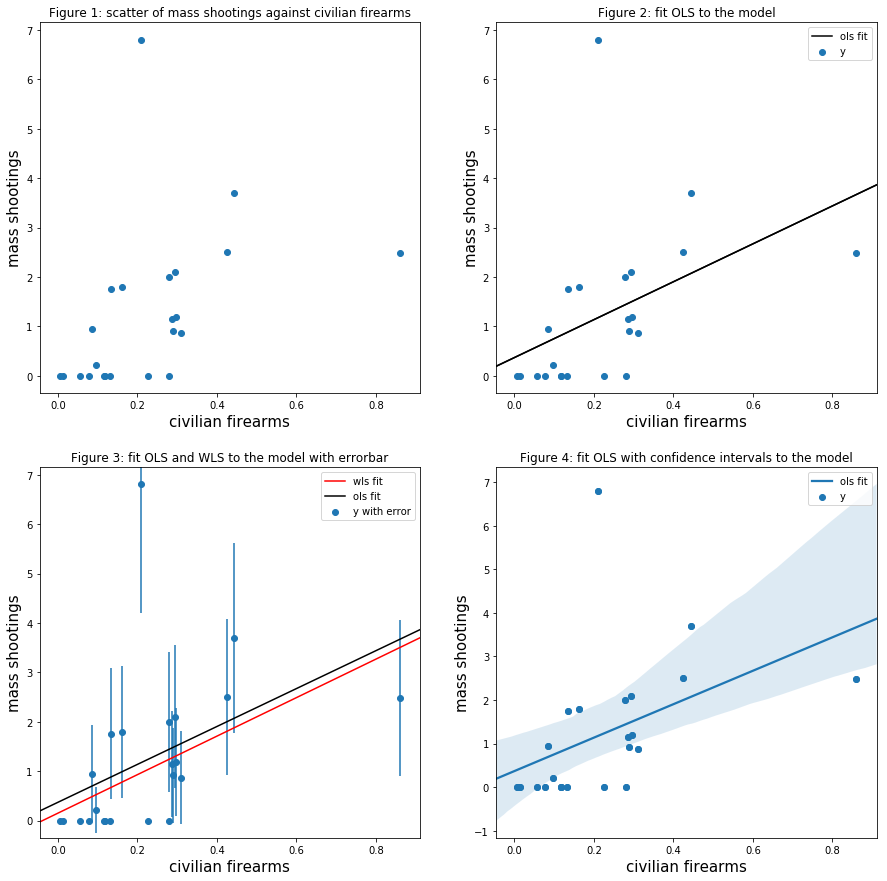

In [94]:
fig = plt.figure(4, figsize=(15,15)) 
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

#scatter plot of x and y
ax1.scatter(x, y)
ax1.set_xlabel('civilian firearms', fontsize=15)
ax1.set_ylabel('mass shootings', fontsize=15)
ax1.set_title('Figure 1: scatter of mass shootings against civilian firearms')

#fit ols line
ax2.scatter(x, y)
mod_ols = smf.ols(formula='y ~ x', data = data).fit()
abline_plot(model_results=mod_ols, ax=ax2, color='black')
ax2.set_xlabel('civilian firearms', fontsize=15)
ax2.set_ylabel('mass shootings', fontsize=15)
ax2.set_title('Figure 2: fit OLS to the model')
ax2.legend(['ols fit', 'y'])

#fit ols and wls line
ax3.scatter(x, y)
mod_wls = smf.wls(formula='y ~ x', data = data, weights=abs(weights)).fit()
abline_plot(model_results=mod_wls, ax=ax3, color='red')
abline_plot(model_results=mod_ols, ax=ax3, color='black')
ax3.errorbar(data.x, data.y, yerr=np.sqrt(data.y)*1.0, fmt='.')
ax3.set_xlabel('civilian firearms', fontsize=15)
ax3.set_ylabel('mass shootings', fontsize=15)
ax3.set_title('Figure 3: fit OLS and WLS to the model with errorbar')
ax3.legend(['wls fit','ols fit', 'y with error'])

#fit ols with interval confidence
ax4.scatter(x, y)
mod_ols = smf.ols(formula='y ~ x', data = data).fit()
abline_plot(model_results=mod_ols, ax=ax2, color='black')
sns.regplot(x="x", y="y", data=data)
ax4.set_xlabel('civilian firearms', fontsize=15)
ax4.set_ylabel('mass shootings', fontsize=15)
ax4.set_title('Figure 4: fit OLS with confidence intervals to the model')
ax4.legend(['ols fit', 'y'])

**Figure1:** The scatter plot of the average number of mass shootings per person against the average number of civilian firearms per person, after changing to the roughly same order of magnitude. The mass shooting and civilian seems to have positive correlation.

**Figure2:** Fit the ols to the model, the line is fitted with minimum residuals.

**Figure3:** Fit the line from both los and wls, with the statistic error bar

**Figure4:** Show the confidence intervals in the model

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

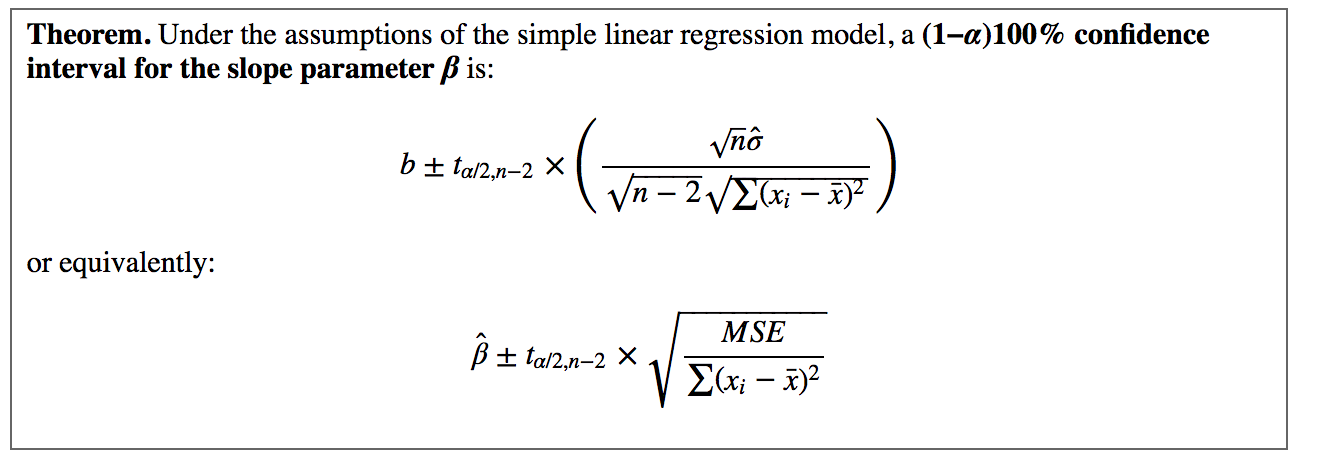

In [231]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

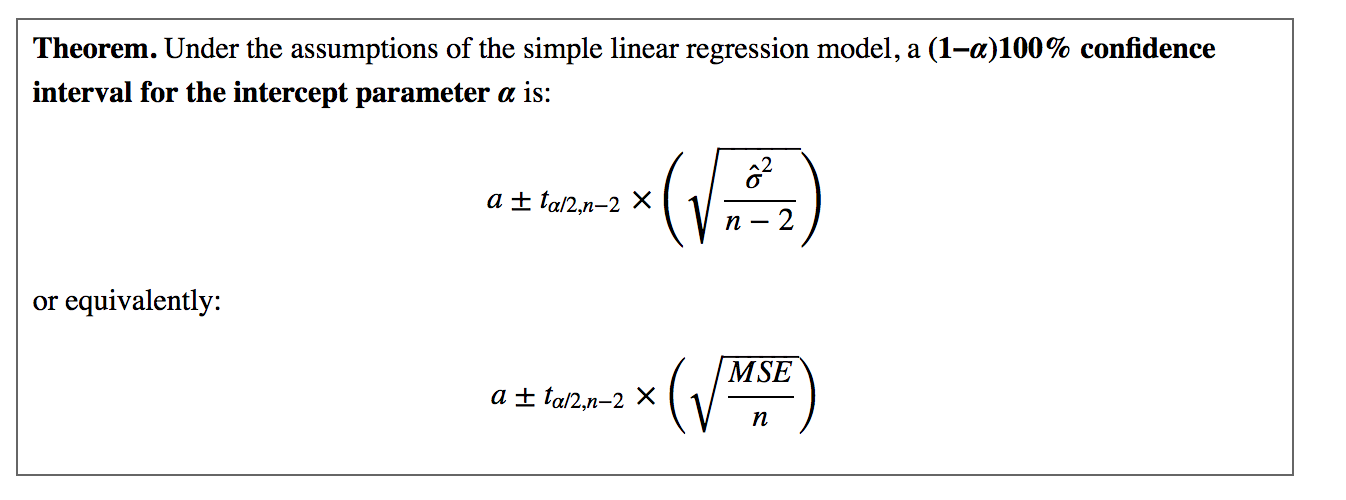

In [232]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [106]:
n = len(data.y)
interc = mod_wls.params[0]
coef = mod_wls.params[1]

In [108]:
sigma = np.sqrt(np.sum((data.y-mod_wls.predict())**2)/n)
sigma

1.433398569156145

In [109]:
t = sp.stats.t.ppf(0.975, n-2)
t

2.079613844727662

In [112]:
interc_min = interc - t * np.sqrt(sigma**2/(n-2))
interc_max = interc + t * np.sqrt(sigma**2/(n-2))
coef_min = coef - t * (np.sqrt(n)*sigma/(np.sqrt(n-2)*np.sqrt(np.sum((data.x-np.mean(data.x))**2))))
coef_max = coef + t * (np.sqrt(n)*sigma/(np.sqrt(n-2)*np.sqrt(np.sum((data.x-np.mean(data.x))**2))))

In [113]:
y_min = coef_min * data.x + interc_min
y_max = coef_max * data.x + interc_max

Text(0.5,1,'confidence interval of the model parameters slope and intercept')

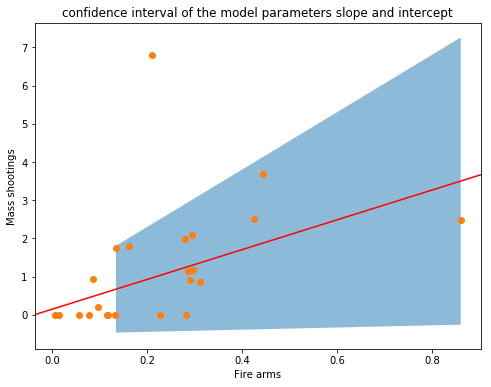

In [123]:
fig, ax = plt.subplots(figsize=(8,6))
ax.fill_between(data.x, y_min, y_max,alpha=0.5)
abline_plot(model_results=mod_wls, ax=ax, color='red')
ax.scatter(data.x,data.y)
ax.set_ylabel("Mass shootings")
ax.set_xlabel("Fire arms");
ax.set_title('confidence interval of the model parameters slope and intercept', fontsize = 12)

**Figure1**: the confidence interval of the model parameters slope and intercept

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

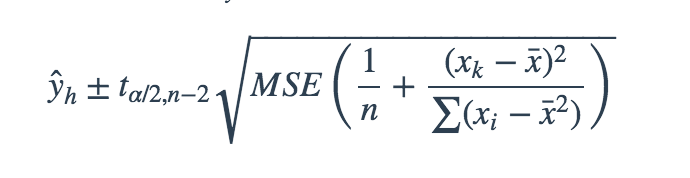

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

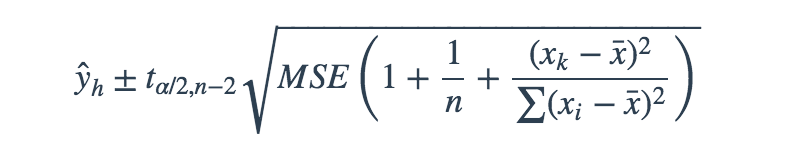

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

/Users/A123/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


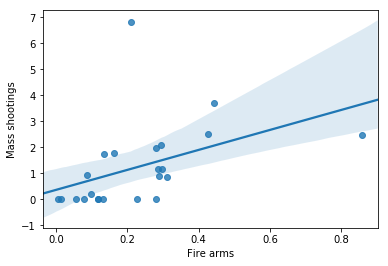

In [128]:
from IPython.display import Image
#Image(filename="../Lab5_fb55/ciYaverage.png")pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=data);

plt.ylabel("Mass shootings")
plt.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

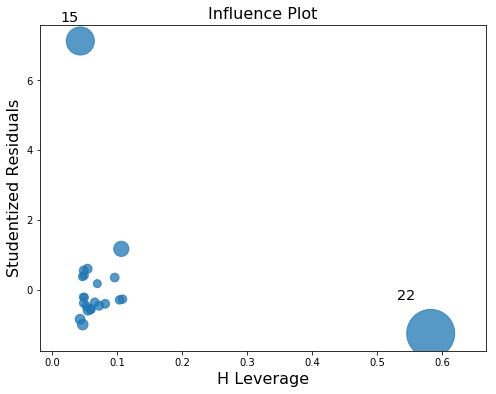

In [133]:
fig, ax = plt.subplots(figsize=(8,6))
sm.graphics.influence_plot(mod_ols, alpha  = 0.05, ax=ax, criterion="cooks")

**Figure2**: The influence plot of the ols 

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

In [135]:
h_level = 1/n + (data['x'] - data['x'].mean())**2/np.sum(data['x']**2)

In [138]:
error = mod_wls.predict() - data.y
standardized_res = error/np.sqrt(mod_wls.mse_resid*(1-h_level))

Text(0.5,1,'Standardized Residuals aganist the H leverage')

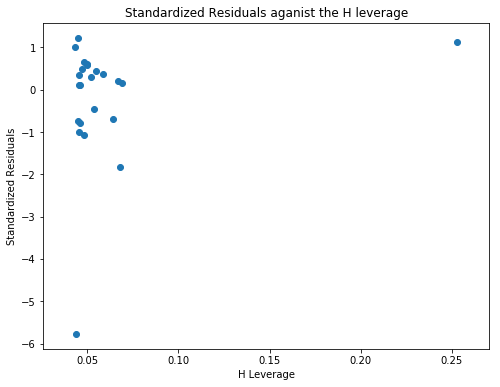

In [141]:
plt.figure(figsize=(8,6))
plt.scatter(h_level,standardized_res)
plt.xlabel('H Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals aganist the H leverage')

**Figure 3**: Standardized Residuals aganist the H leverage in wls 

## Discuss your findings